# Deep Dive With Assistants API

In [1]:
import openai
client = openai.OpenAI()

### Use Of Parameters - `instructions`, `tools`, `tool_resources`

In [5]:
file = client.files.create(
  file=open("data/revenue-forecast.csv", "rb"),
  purpose='assistants'
)

In [20]:
assistant = client.beta.assistants.create(
  name="Data visualizer",
  instructions="You are great at creating beautiful data visualizations. You analyze data present in .csv files, understand trends, and come up with data visualizations relevant to those trends. You also share a brief text summary of the trends observed.",
  model="gpt-4o-mini",
  tools=[{"type": "code_interpreter"}],
  tool_resources={
    "code_interpreter": {
      "file_ids": [file.id]
    }
  }
)

### Managing Threads

In [21]:
thread = client.beta.threads.create(
  messages=[
    {
      "role": "user",
      "content": "Create 3 data visualizations based on the trends in this file.",
      "attachments": [
        {
          "file_id": file.id,
          "tools": [{"type": "code_interpreter"}]
        }
      ]
    }
  ]
)

In [ ]:
file = client.files.create(
  file=open("data/open_ai_hq.jpg", "rb"),
  purpose="vision"
)

image_url = """https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Pioneer_Building%2C_San_Francisco_%282019%29_-1.jpg/1920px-Pioneer_Building%2C_San_Francisco_%282019%29_-1.jpg"""

thread = client.beta.threads.create(
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is the difference between these images?"
        },
        {
          "type": "image_url",
          "image_url": {"url": image_url}
        },
        {
          "type": "image_file",
          "image_file": {"file_id": file.id}
        },
      ],
    }
  ]
)

In [ ]:
thread = client.beta.threads.create(
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is this an image of?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": image_url,
            "detail": "high"
          }
        },
      ],
    }
  ]
)

### Creating a Run

In [24]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  model="gpt-4o-mini",
  instructions="New instructions that override the Assistant instructions",
  tools=[{"type": "code_interpreter"}, {"type": "file_search"}]
)

In [25]:
messages = client.beta.threads.messages.list(thread_id=thread.id)
print("messages: ")
for message in messages:
    # assert message.content[0].type == "text"
    print({"role": message.role, "message": message.content[0]})

messages: 
{'role': 'assistant', 'message': TextContentBlock(text=Text(annotations=[], value='Would you like to perform any additional analysis or create more visualizations based on the dataset?'), type='text')}
{'role': 'assistant', 'message': ImageFileContentBlock(image_file=ImageFile(file_id='file-lTUB55pI65r2RCPHEtuwHyAv', detail=None), type='image_file')}
{'role': 'assistant', 'message': TextContentBlock(text=Text(annotations=[], value="The dataset contains monthly data for projected revenue, actual revenue, and variance over a year. The columns present in the dataset are:\n\n1. **Month**: The month of the year.\n2. **Projected Revenue**: The revenue expected for the month.\n3. **Actual Revenue**: The revenue that was actually achieved.\n4. **Variance**: The difference between projected and actual revenue.\n\n### Data Visualizations\n\nBased on the trends observed in this data, I'll create the following three visualizations:\n\n1. **Line Plot**: To show the trend of projected vs 

### Explore The File

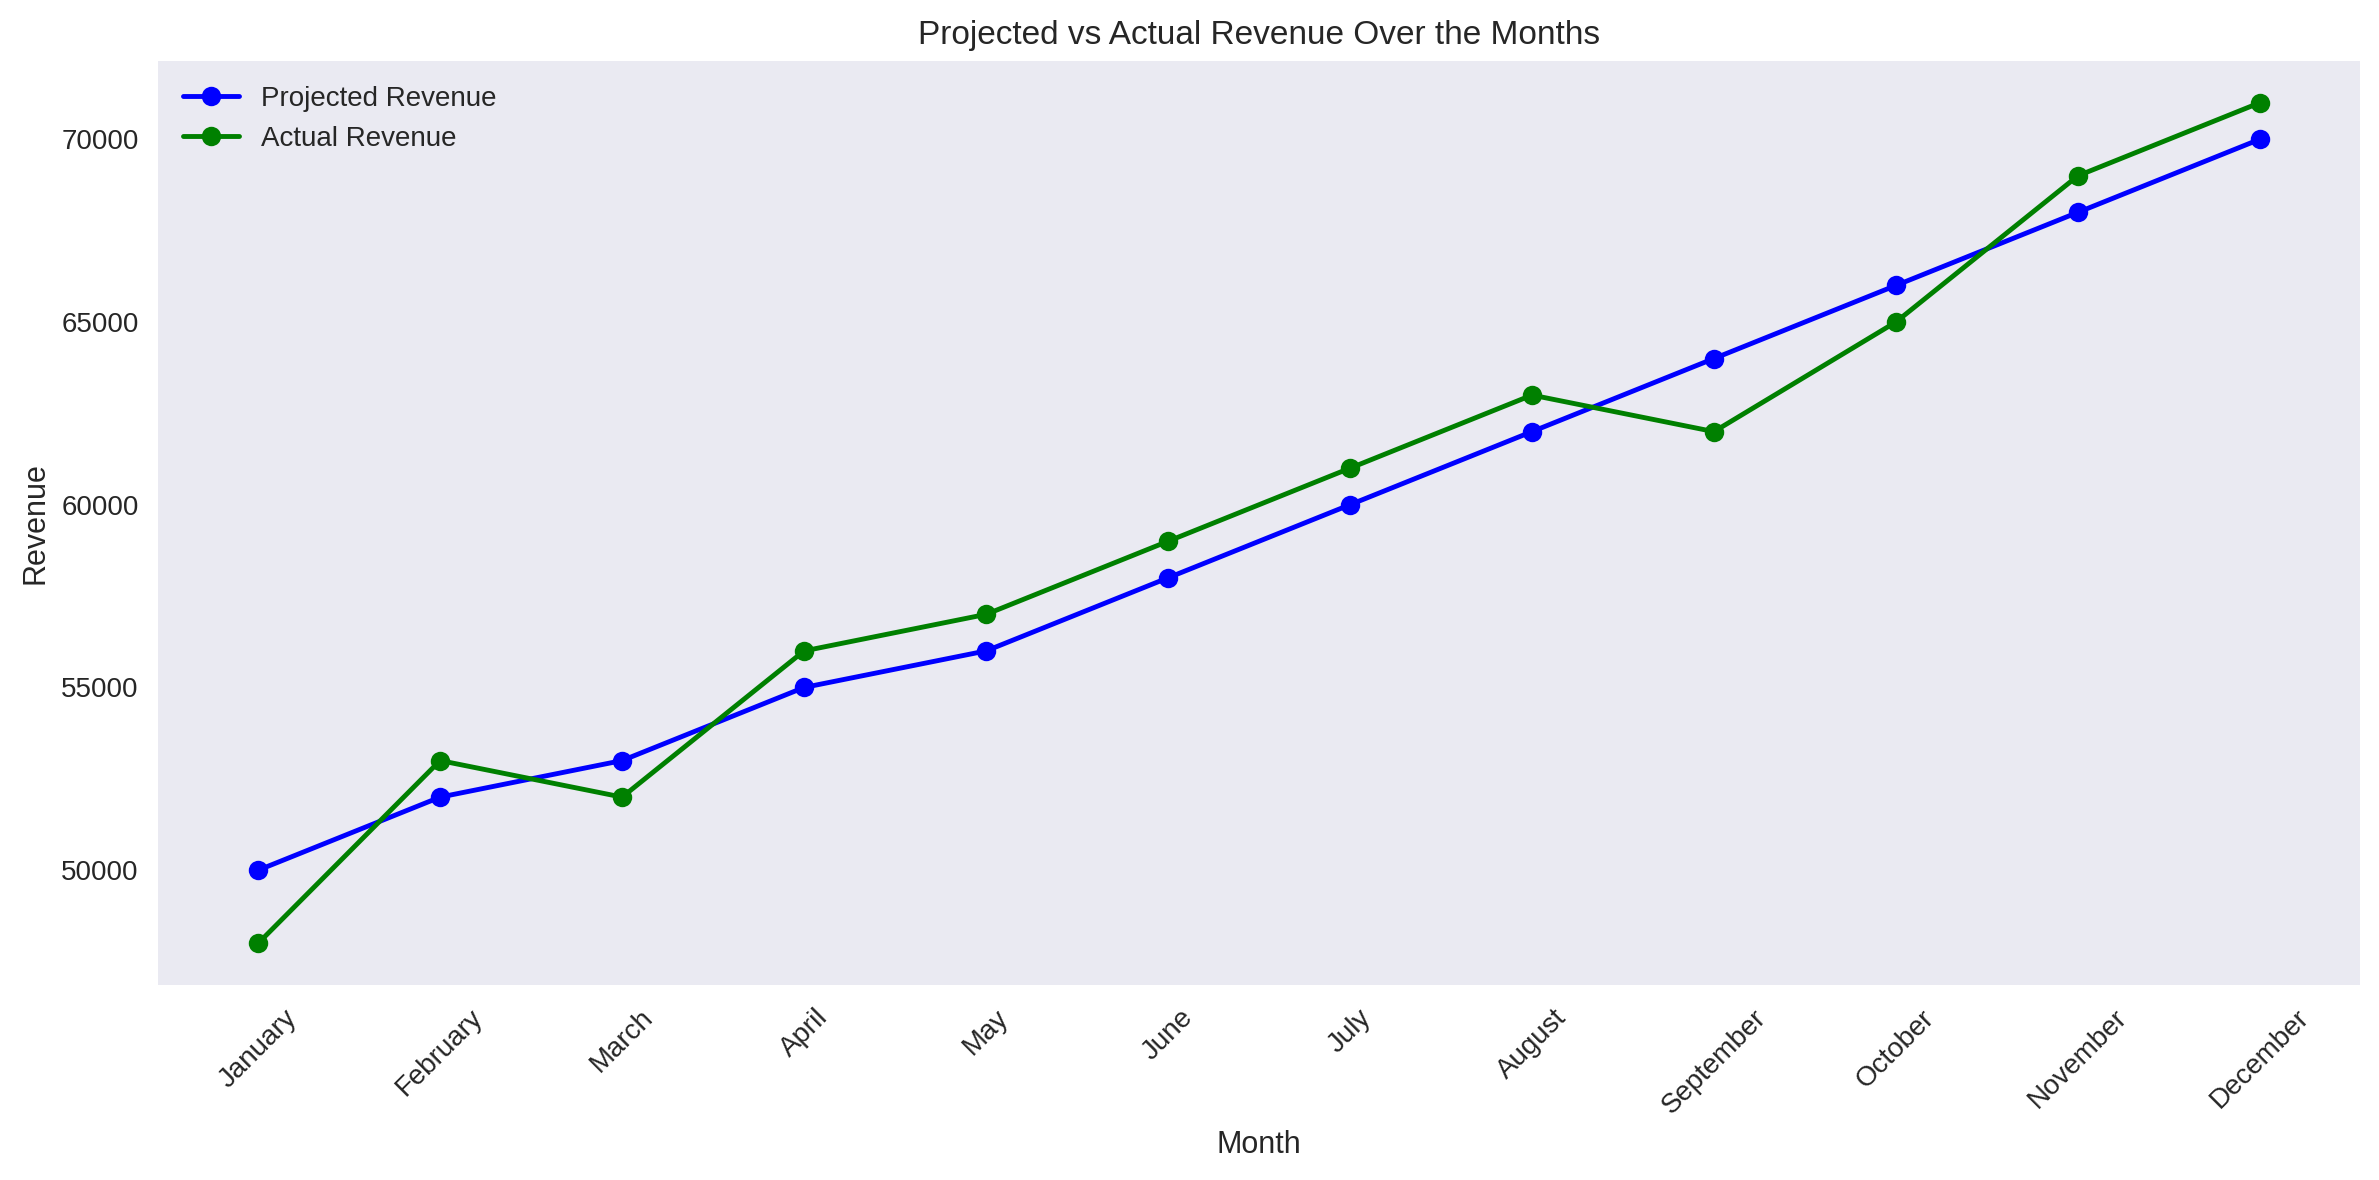

In [26]:
from PIL import Image
import io

file_content = client.files.content("file-lTUB55pI65r2RCPHEtuwHyAv")
Image.open(file_content)
